Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import sys
print(sys.executable)

c:\Users\kunkaush1\Documents\ML-DL\ml-regression\venv\python.exe


In [3]:
#Read the Dataset
df=pd.read_csv('C:\\Users\\kunkaush1\\Documents\\ML-DL\\ml-regression\\height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

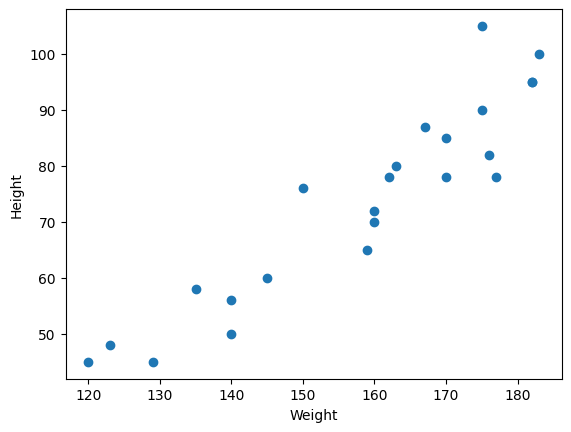

In [4]:
plt.scatter(df["Height"],df["Weight"])
plt.xlabel("Weight")
plt.ylabel("Height")

In [5]:
## Divide the dataset into dependent and independent feature
X=df[["Weight"]]##independent feature
y=df[["Height"]] ##dependent feature

In [6]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [7]:
X.shape,y.shape

((23, 1), (23, 1))

In [8]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18, 1), (5, 1))

In [9]:
## Standardized the dataset train independent feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

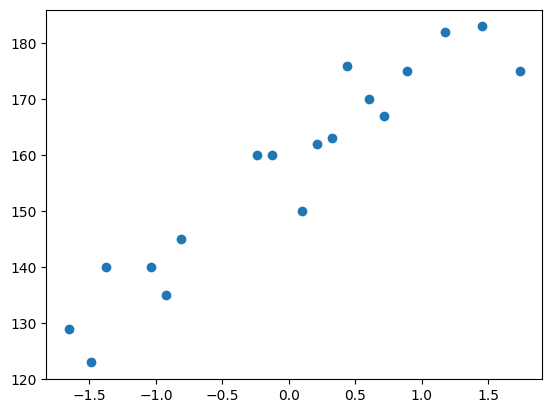

In [10]:
plt.scatter(X_train,y_train)

In [11]:
#Train Simple Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression() 

In [12]:
regressor.fit(X_train,y_train)

LinearRegression()

In [13]:
print("The slope of weight is: ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope of weight is:  [[17.03440872]]
Intercept: [157.5]


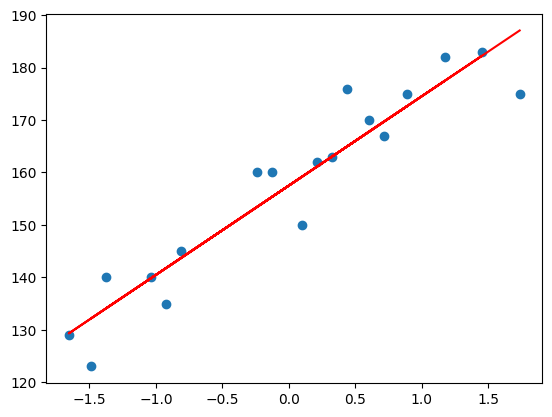

In [14]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### Prediction of the train data
1. predicted height output = intercept+coef_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)

### Prediction of the test data
1. predicted height output = intercept+coef_(Weights)
2. y_pred_test = 157.5 + 17.03(X_test)

In [15]:
y_pred_test = regressor.predict(X_test)
y_pred_test,y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

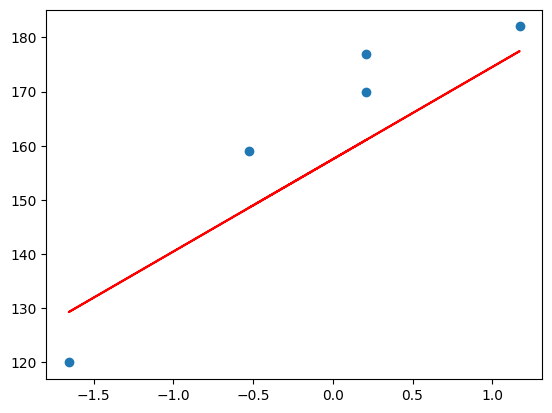

In [16]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

# Performance Metrics:
    # Peformance metrics in ML helps us indentifying how well a model perfroms especially wile making predications. Differenent type of problem have different type of metrics.
        # Classification:
            # Accuracy
            # Precision
            # Recall (Sensitivity or True Positive Rate)
            # F1 Score
            # ROC-AUC (Receiver Operating Characteristic - Area Under Curve)
            # Confusion Matrix
        #  Regression Metrics
            # Mean Absolute Error (MAE)
            # Mean Squared Error (MSE)
            # Root Mean Squared Error (RMSE)
            # R-squared (Coefficient of Determination)
        # Clustering Metrics
            # Silhouette Score
            # Davies-Bouldin Index
            # Adjusted Rand Index (ARI)
            

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [18]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.776986986042344


In [19]:
regressor

LinearRegression()

In [20]:
#new data point weight is 80
scaled_weight=scaler.transform([[80]])
scaled_weight[0]

C:\Users\kunkaush1\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.32350772])

In [21]:
print(regressor.predict([scaled_weight[0]])[0][0])
print("The height prediction for weight 80kg is:",regressor.predict([scaled_weight[0]])[0][0])

163.01076265919562
The height prediction for weight 80kg is: 163.01076265919562


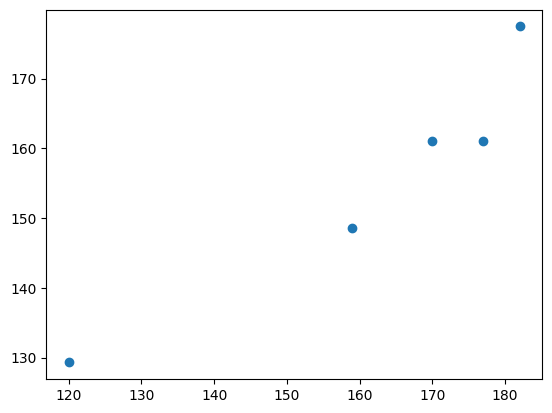

In [22]:
plt.scatter(y_test,y_pred_test)

In [23]:
## residuals
residuals=y_test-y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


C:\Users\kunkaush1\AppData\Local\Temp\ipykernel_6832\1148844512.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( residuals,kde=True)


<Axes: ylabel='Density'>

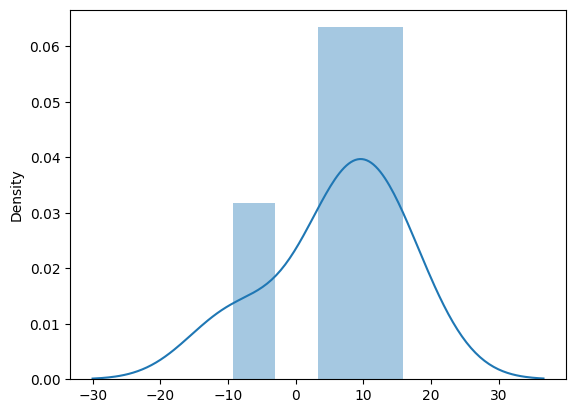

In [24]:
#plot the residuals

import seaborn as sns
sns.distplot( residuals,kde=True)

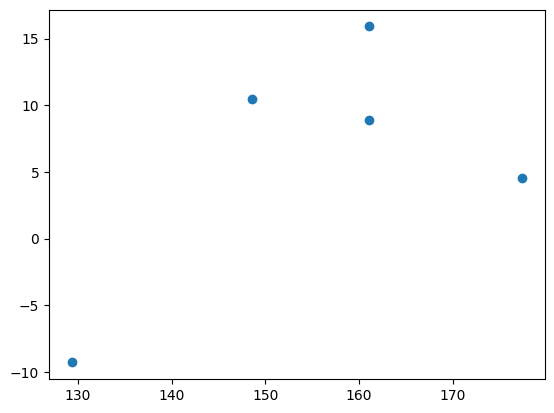

In [25]:
# Scatter plot with resepct to residuals and predictions
#uniform distribution
plt.scatter(y_pred_test,residuals)